<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/Editing/labs/04%20-%20Visualization/exercises/solutions/exercises_lab_4_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Solutions to the exercises 1 to 3**

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
url = 'https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/Credit.csv'
data = pd.read_csv(url)
data = data.rename( columns = {'Unnamed: 0' : 'CustomerID' })
data.head(5)

,CustomerID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


##Correction of Exercise 1
###Correction of question 1.1


Text(0, 0.5, 'Number of females')

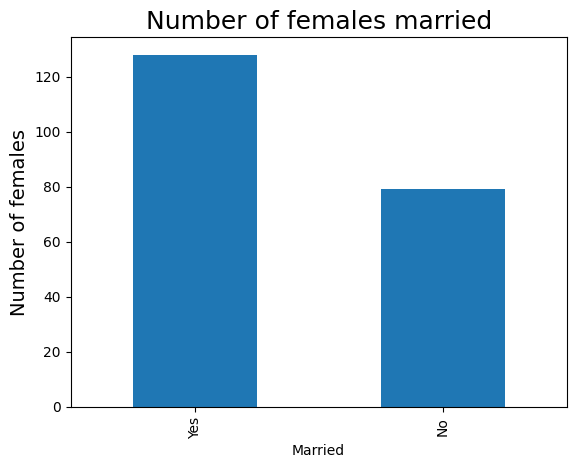

In [39]:
data1 = data[data['Gender'] == 'Female']
data2 = data1['Married'].value_counts()
graph = data2.plot(kind='bar')
graph.set_title('Number of females married', size=18)
graph.set_xlabel('Married')
graph.set_ylabel('Number of females', size=14)

Alternative solution to question 1.1.

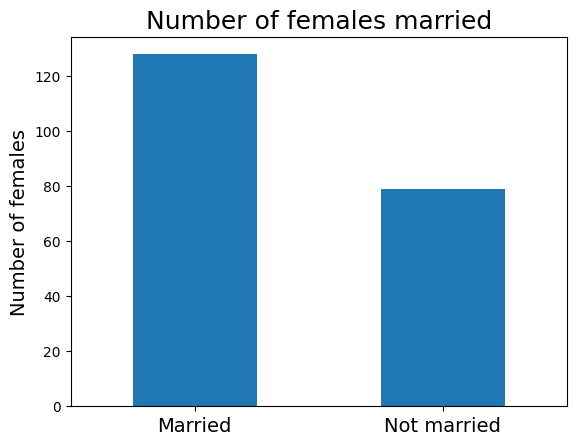

In [40]:
data3 = (data.groupby('Gender')['Married'].value_counts())

# a few transformations to drop the student column and set "married" as the index
data_bar = data3[[2,3]].to_frame().rename( columns = {'Married' : 'Count' }).reset_index().drop(['Gender'], axis=1)

# change the labels from YES and NO to something more explicit
data_bar['Married'] = data_bar['Married'].map({'No': 'Not married', 'Yes': 'Married'})
# set 'Married' as the index to plot the labels
data_bar.set_index('Married', inplace=True)

# all same as above
graph = data_bar.plot(kind = 'bar', legend=False)
graph.set_title('Number of females married', size=18)
graph.set_xlabel('')
graph.set_ylabel('Number of females', size=14)

# change the rotation of the labels for the x-axis
graph.tick_params(axis='x', labelsize=14, labelrotation=0)

###Correction of question 1.2

In [38]:
ratio = (data1[data1['Married'] == 'No'].value_counts().sum())/data1['Married'].value_counts().sum()
ratio

0.38164251207729466

##Correction of Exercise 2

Text(0.5, 1.0, 'Proportion of customers that are married')

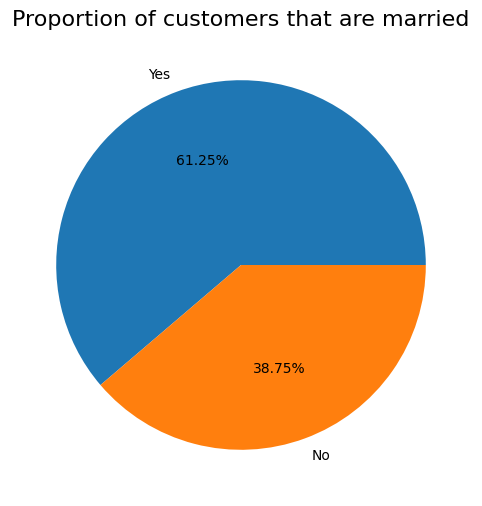

In [22]:
data_pie = data['Married'].value_counts()
graph = data_pie.plot(kind = 'pie', figsize=(9,6), autopct='%.2f%%', label='')
graph.set_title("Proportion of customers that are married", size=16)

##Correction of Exercise 3 (example)

<Axes: >

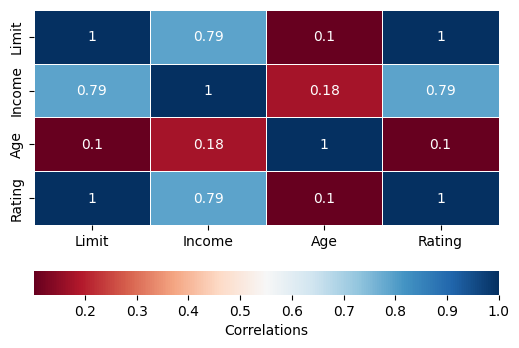

In [ ]:
#Example of code - other displays are possible
fig=plt.figure(figsize=(6,4))
heat_map = data[['Limit','Income', 'Age', 'Rating']].corr()
sns.heatmap(data = heat_map,cbar_kws = dict(use_gridspec=False, orientation="horizontal", label='Correlations'),
            annot= True, linewidths= .5, cmap= 'RdBu')